In [1]:
import os
import sys
import pandas as pd
import geopandas 
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

C:\Users\USUARIO\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dir = os.getcwd()
print(dir)
data_dir='C:\\Users\\USUARIO\\Documents\\trabajo_Grado\\SHP\\'
#os.listdir(data_dir)

C:\Users\USUARIO\Documents\trabajo_Grado\script


# **CASO DE APLICACIÓN - SÁCHICA BOYACÁ**

<p><img alt="Via con grilla" src="img/via_grid.png" /></p>

# CARGA DE LOS DATOS

In [3]:
df_propiedades= geopandas.read_file(data_dir + '\SACHICA\sachica.shp')

In [4]:
df_propiedades.head(2)

CODIGOVIA       FECHA     LONGITUD  PENDIENTE  ANCHOCARR  ANCHOBERMA  \
0  60BYASACH03  2018-04-17  1403.339966    4.89689        4.8         0.0   
1   6008SACH04  2018-04-02   705.992981   -3.20398        4.8         0.0   

   ANCHOCUNET  ANCHOSEPAR   OBS  TIPOTERR  ...  ESTADO  NUMCARR   Shape_Leng  \
0         0.0         0.0  None         3  ...       2        1  1344.989009   
1         0.0         0.0  None         3  ...       2        1   691.907034   

   mink_dem  mink_dem_L  mink_dem_1  mink_dem_2 mink_dem_3 mink_dem_f  \
0  0.891841    0.891841         0.0        None       None   0.891841   
1  0.955710    0.955710         0.0        None       None        NaN   

                                            geometry  
0  LINESTRING Z (-73.53202 5.58607 2183.90832, -7...  
1  LINESTRING Z (-73.55804 5.60520 2141.14008, -7...  

[2 rows x 21 columns]

# EDA - Analsisi Exploratorio de Datos

## Tipo de datos

In [5]:
df_propiedades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CODIGOVIA   59 non-null     object  
 1   FECHA       59 non-null     object  
 2   LONGITUD    59 non-null     float64 
 3   PENDIENTE   59 non-null     float64 
 4   ANCHOCARR   59 non-null     float64 
 5   ANCHOBERMA  59 non-null     float64 
 6   ANCHOCUNET  59 non-null     float64 
 7   ANCHOSEPAR  59 non-null     float64 
 8   OBS         0 non-null      object  
 9   TIPOTERR    59 non-null     int64   
 10  TIPOSUPERF  59 non-null     int64   
 11  ESTADO      59 non-null     int64   
 12  NUMCARR     59 non-null     int64   
 13  Shape_Leng  59 non-null     float64 
 14  mink_dem    59 non-null     float64 
 15  mink_dem_L  57 non-null     float64 
 16  mink_dem_1  59 non-null     float64 
 17  mink_dem_2  0 non-null      object  
 18  mink_dem_3  0 non-null      object  
 19  mi

Las variables contextuales se definen de la siguiente manera segun la normatividad vigente (resolucion 412 de 2020 ):


|  Nombre | Dominio | Obligatoria |
 |-------------|-------|-------| 
 | CODIGOVIA          |  Texto de 4 a 15 caracteres  |SI|
 | FECHA    |  Texto de 10 caracteres en formato: AAAA-MM-DD  |SI|
 | OBS  | Texto de 10 a 250 caracteres   |NO|
 

Las variables cuantitativas de interes se definen de la siguiente manera segun la normatividad vigente (resolucion 412 de 2020 ):

 |  Nombre | Dominio | Obligatoria |
 |-------------|-------|-------| 
 | LONGITUD          |  Número entre 1 y 25000  |SI|
 | PENDIENTE    |  Número entre -45 y 45    |SI|
 | NUMCARR  | Número entre 1 y 6   |SI|
 | ANCHOCARR  | Número entre 1,5 y 5    |SI|
 | ANCHOBARMA  | Número entre 0,4 y 6   |NO|
 | ANCHOCUNET  | Número entre 0,1 y 4   |NO|
 | ANCHOSEPAR  | Texto de 10 a 250 caracteres   |NO|
 


Las variables categoricas de interes se definen de la siguiente manera segun la normatividad vigente (resolucion 412 de 2020 ):

 | Nombre | Dominio | Obligatoria |
 |-------------|-------|-------| 
 | TIPOTERR          |  Número entre 1 y 4 en donde: 1 = Escarpado, 2 = Montañoso, 3 = Ondulado, 4 = Plano |SI|
 | TIPOSUPERF    |  Número entre 1 y 8 en donde: 1 = Destapado, 2 = Afirmado, 3 = Pavimento asfáltico, 4 = Tratamiento superficial, 5 = Pavimento rígido, 6 = Placa huella, 7 = Pavimento articulado, 8 = Otro  |SI|
 | ESTADO  | Número entre 1 y 5 en donde: 1 = Bueno, 2 = Regular, 3 = Malo, 4 = Pésimo, 5 = Intransitable   |SI|
 

## Valores Nulos, Cero y Fuera de rango

In [6]:
# Datos con longitud 0
a = len(df_propiedades[df_propiedades.LONGITUD == 0])
an= len(df_propiedades[df_propiedades.LONGITUD.isna()])

# Datos con pendiente diferente uera de rango (-45 ,45) grados
b = len(df_propiedades[np.abs(df_propiedades.PENDIENTE) > 45])
bn= len(df_propiedades[df_propiedades.PENDIENTE.isna()])

# Datos de ancho 
c = len(df_propiedades[df_propiedades.ANCHOCARR <1.5])
cn= len(df_propiedades[df_propiedades.ANCHOCARR.isna()])
d = len(df_propiedades[df_propiedades.ANCHOBERMA ==0])
dn= len(df_propiedades[df_propiedades.ANCHOBERMA.isna()])
e = len(df_propiedades[df_propiedades.ANCHOCUNET ==0])
en= len(df_propiedades[df_propiedades.ANCHOCUNET.isna()])
f = len(df_propiedades[df_propiedades.ANCHOSEPAR ==0])
fn= len(df_propiedades[df_propiedades.ANCHOSEPAR.isna()])

# Datos furea de Dominio 
g = len(df_propiedades[~df_propiedades.TIPOTERR.isin([1,2,3,4])])
gn= len(df_propiedades[df_propiedades.TIPOTERR.isna()])
h = len(df_propiedades[~df_propiedades.TIPOSUPERF.isin([1,2,3,4,5,6,7,8])])
hn= len(df_propiedades[df_propiedades.TIPOSUPERF.isna()])
i = len(df_propiedades[~df_propiedades.ESTADO.isin([1,2,3,4,5])])
i_n= len(df_propiedades[df_propiedades.ESTADO.isna()])
j = len(df_propiedades[~df_propiedades.NUMCARR.isin([1,2,3,4,5,6])])
jn= len(df_propiedades[df_propiedades.NUMCARR.isna()])


# Datos con longitud 0
k = len(df_propiedades[df_propiedades.Shape_Leng == 0])
kn= len(df_propiedades[df_propiedades.Shape_Leng.isna()])

## DIM FRACTAL!!!
l = len(df_propiedades[df_propiedades.mink_dem == 0])
ln= len(df_propiedades[df_propiedades.mink_dem.isna()])


t=a+an+b+bn+c+cn+d+dn+e+en+f+fn+g+gn+h+hn+i+i_n+j+jn+k+kn+  l+ln

print("los valores inconsistentes de las variables en estudio son:\n"
      "    Longitud - [LONGITU] :" + str(a+an) + "\n"
      "    Pendiente - [PENDIENTE] :" + str(b+bn) + "\n"
      "    Ancho Carril - [ANCHOCARR] :" + str(c+cn) + "\n"
      "    Ancho Berma - [ANCHOBERRMA] :" + str(d+dn) + "\n"
      "    Ancho Cuneta - [ANCHOCUNET] :" + str(e+en) + "\n"
      "    Ancho Separador - [ANCHOCEPAR] :" + str(f+fn) + "\n"
      "    Tipo de Terreno - [TIPOTERR] :" + str(g+gn) + "\n"
      "    Tipo de Superficie - [TIPOSUPERF] :" + str(h+hn) + "\n"
      "    Estado - [ESTADO] :" + str(i+i_n) + "\n"
      "    Numero de carriles - [NUMCARR] :" + str(j+jn) + "\n"
      "    Longitud - [Shape_Leng] :" + str(k+kn) + "\n"
      "    Dimension Fractal - [mink_dem] :" + str(l+ln) + "\n"
      "    TOTAL :" + str(t) 
     )

##FALTA AQUI LA DIM FRACTAL!!!


los valores inconsistentes de las variables en estudio son:
    Longitud - [LONGITU] :0
    Pendiente - [PENDIENTE] :0
    Ancho Carril - [ANCHOCARR] :0
    Ancho Berma - [ANCHOBERRMA] :59
    Ancho Cuneta - [ANCHOCUNET] :59
    Ancho Separador - [ANCHOCEPAR] :59
    Tipo de Terreno - [TIPOTERR] :0
    Tipo de Superficie - [TIPOSUPERF] :0
    Estado - [ESTADO] :0
    Numero de carriles - [NUMCARR] :0
    Longitud - [Shape_Leng] :0
    Dimension Fractal - [mink_dem] :0
    TOTAL :177


Existen variables par los que los valores cero representan la ausencia de la caracteristica. Estos registros no cumplen con los el dominio de la resolucion del SINC.
Cara reslatar que los valores de Ancho a excepcion de ACNCHOCARR no obligatorios de tal forma que debido a su magnitud de datos cero  / nulos se evaluara su pertinencia.


# Estadisticas Descriptivas

In [7]:
df_propiedades['ABS_PENDIENTE'] = np.abs(round(df_propiedades['PENDIENTE']))
var=['LONGITUD','ABS_PENDIENTE','ANCHOCARR','ANCHOBERMA','ANCHOCUNET','ANCHOSEPAR','TIPOTERR','TIPOSUPERF','ESTADO','NUMCARR',
'Shape_Leng','mink_dem']
#df_propiedades=df_propiedades[var]
df_propiedades=df_propiedades
df_propiedades.describe()

LONGITUD  PENDIENTE  ANCHOCARR  ANCHOBERMA  ANCHOCUNET  ANCHOSEPAR  \
count    59.000000  59.000000  59.000000        59.0        59.0        59.0   
mean   1114.321029   0.791989   3.864407         0.0         0.0         0.0   
std     922.910929   7.756342   0.452488         0.0         0.0         0.0   
min       6.670280 -16.734100   3.000000         0.0         0.0         0.0   
25%     436.267502  -4.557415   3.500000         0.0         0.0         0.0   
50%     945.197998  -0.860972   3.700000         0.0         0.0         0.0   
75%    1446.315002   6.773570   4.050000         0.0         0.0         0.0   
max    3996.840088  16.846201   5.000000         0.0         0.0         0.0   

        TIPOTERR  TIPOSUPERF     ESTADO  NUMCARR   Shape_Leng   mink_dem  \
count  59.000000    59.00000  59.000000     59.0    59.000000  59.000000   
mean    2.576271     2.20339   2.067797      1.0  1086.079817   1.018546   
std     1.234607     0.80472   0.907144      0.0   898.574927   0.075081   
min     1.000000     2.00000   1.000000      1.0     6.559331   0.886868   
25%     1.000000     2.00000   1.500000      1.0   431.800747   0.971266   
50%     3.000000     2.00000   2.000000      1.0   912.536723   1.003570   
75%     4.000000     2.00000   2.000000      1.0  1399.408143   1.060007   
max     4.000000     6.00000   4.000000      1.0  3882.214654   1.274071   

       mink_dem_L  mink_dem_1  mink_dem_f  ABS_PENDIENTE  
count   57.000000        59.0   52.000000      59.000000  
mean     1.018962         0.0    1.021941       6.288136  
std      0.076371         0.0    0.077844       4.541194  
min      0.886868         0.0    0.886868       1.000000  
25%      0.969631         0.0    0.972529       2.000000  
50%      1.003570         0.0    1.010825       5.000000  
75%      1.063016         0.0    1.064491       9.500000  
max      1.274071         0.0    1.274071      17.000000

# Correlacion de variables

<AxesSubplot:>

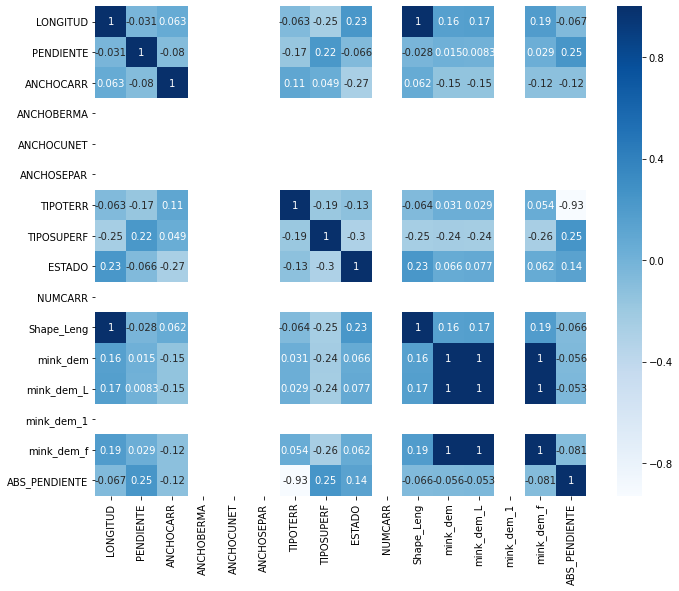

In [8]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_propiedades.corr(), annot=True, cmap="Blues")

# Observaciones sobre los datos


- Las variables LONGITUD y Shape_Leng hacen referencia a la misma informacion por tanto solo se tiene en cuenta el campo Shape_Leng
- El signo de la pendiente es relativo al sentido de circulacion de la via y al eje local de coordenadas para el cual se toma la magnitud, por tanto se plantea tomar como nueva variable derivada el __Valor Absoluto de la pendiente__.
- Para la variable ANCHOCARR los valores representativos deberan no solo ser mayores a Cero, para una consistencia logica sino que deberan considerar por lo menos una distancia que permita la circulacion de un vehiculo pequeño por tanto el valor minimo de carril a tener en cuenta es de 1.5 m.
- Segun el dominio de la variable TIPOTERR se puede presumir una correlacion con la variable pendiente ya que los tipos de terreno se asocian con la geomorfologia y esta a su vez con la variación de pendientes del terreno.
- El numero de carriles se considera una variable subjetiva dependiente del personal que registra el valor en campo. La mayoria de vias terciarias tendran circulacion en ambos sentidos ya que localmente no existe oferta adicional para cubrir los origenes y destinos comunes. De otra manera la medida del ancho de la infraestructura aporta mayor informacion excluyendo el sesgo al considerar subjetivamente una ciarta cantidad de carriles.
- Variables con cantidades marginales de datos frente a la disponibilidad informacion de las demas variables (ANCHOVERMA, ANCHOCUNET, ANCHOSEPAR). Estas variables coinciden con la caracteristica "no obligatoria" de la normatividad




# Limpieza de los datos

Segun las observaciones de los datos se eliminan del analisis las variables contextuales ya que no aportan datos relevantes para la clasificacion propuesta
Por otro lado, siguiendo las observaciones sobre los datos se procede a la limpieza relacionada con datos nulos o valores Cero (los casos particulares de las variables:ANCHOVERMA, ANCHOCUNET, ANCHOSEPAR, se evaluara con la representatividad y varianza en el siguente titulo)

In [9]:
df = df_propiedades.dropna(subset=['ABS_PENDIENTE','ANCHOCARR','TIPOTERR','TIPOSUPERF','ESTADO','NUMCARR','Shape_Leng','mink_dem' ])

df=df[(df.Shape_Leng != 0)]
df=df[np.abs(df.ABS_PENDIENTE) <= 45]
df=df[df.ANCHOCARR >=1.5]
df=df[df.TIPOTERR.isin([1,2,3,4])]
df=df[df.TIPOSUPERF.isin([1,2,3,4,5,6,7,8])]
df=df[df.ESTADO.isin([1,2,3,4,5])]
df=df[df.ESTADO.isin([1,2,3,4,5,6])]
## DIM FRACTAL!!!
df_propiedades=df[df.mink_dem >0]

print(len(df_propiedades))

59


# Cantidad de datos representativos - Datos con varianza cercana a Cero

Del analisis de las estadisticas descriptivas resaltan los vaores minimos y de cuartiles de las variables: ANCHOBERMA, ANCHOCUNET y ANCHOSEPAR, ya que en su mayoria son "Cero". Para verificar los aportes de datos representativos apara el analisis se obtienen las proporciones de valores por encima del minimo.

In [10]:
l=len(df_propiedades)
b=len(df_propiedades[df_propiedades.ANCHOBERMA >0])
c=len(df_propiedades[df_propiedades.ANCHOCUNET >0])
d=len(df_propiedades[df_propiedades.ANCHOSEPAR >0])
e=len(df_propiedades[df_propiedades.NUMCARR >1])

print( ' ANCHOBERMA: {}%'.format(round(b*100/l,2))+'\n', 'ANCHOCUNET: {}%'.format(round(c*100/l,2))+'\n',
      'ANCHOSEPAR: {}%'.format(round(d*100/l,2))+'\n', 'ANCHOCUNET: {}%'.format(round(e*100/l,2))+'\n')

 ANCHOBERMA: 0.0%
 ANCHOCUNET: 0.0%
 ANCHOSEPAR: 0.0%
 ANCHOCUNET: 0.0%



- Las variables ANCHO BERMA y ANCHOSEPAR cuantan con proporciones marginales de datos diferentes a cero por tanto no se tendran en cuanta.
- la variable ANCHOCUNET cuenta con una proporcion de datos diferentes a Cero igual a 35% de tal forma que puede ser relvante para el analsiis, sin embargo, se advierte un posible desvalance entre los valores de la variable que pueda distorcionar los datos.

NO es conveniente incluir variables que tengan una varianza próxima a cero, es decir, predictores que toman solo unos pocos valores, de los cuales, algunos aparecen con muy poca frecuencia.
Se establece un umbral para la varianza por debajo del cual las variables seran desechadas, en este caso el umbrar toma el valor de 0.25


In [11]:
### FILTRO DE VARIABLES NO OBJECT y GEOEMTRY

filtro = df_propiedades.select_dtypes(exclude=['object','geometry'])

#Aplicacion del umbral de varianza /// https://medium.com/nerd-for-tech/removing-constant-variables-feature-selection-463e2d6a30d9
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(threshold=.25)
X_high_variance = thresholder.fit_transform(filtro)

#Variables con varianza cercana a cero e inferior al umbral
low_var = [column for column in filtro.columns if column not in filtro.columns[thresholder.get_support()]]
print('low_var: ',low_var)
#Variables con varianza superior al umbral
high_var = [column for column in filtro.columns if column in filtro.columns[thresholder.get_support()]]
print('high_var: ',high_var)

low_var:  ['ANCHOCARR', 'ANCHOBERMA', 'ANCHOCUNET', 'ANCHOSEPAR', 'NUMCARR', 'mink_dem', 'mink_dem_L', 'mink_dem_1', 'mink_dem_f']
high_var:  ['LONGITUD', 'PENDIENTE', 'TIPOTERR', 'TIPOSUPERF', 'ESTADO', 'Shape_Leng', 'ABS_PENDIENTE']


Se comprueva entonces que las variavles ANCHOBERMA, ANCHOCUNET y ANCHOSEPAR no cuentan con caracteristicas faborables para ser empleadas dentro del modelo de agrupamiento adicionalmente las variables ANCHOCARR y NUMCARR tampoco seran tenidas en cuenta.

## Correlacion Pendiente - Tipo Terrerno

Como sugeria el mapa de calor de correlaciones y se verifica con las siguientes graficas, existe una clara relacion entre la pendiente (en este caso en valor absoluto) y la clasificacion cualitativa de tipo de terreno. Pendientes altas corresponderan a terrenos escarpados (1) y pendientes bajas corresponderan a terrenos planos(4). Por tanto para efectos del estudio resulta conveniente seleccionar solo una de las variables, entendiendo que se busca implementar una agrupamiento se selecciona la variable continua ABS_PENDIENTE ya que aporta mayor cantidad de informacion. 

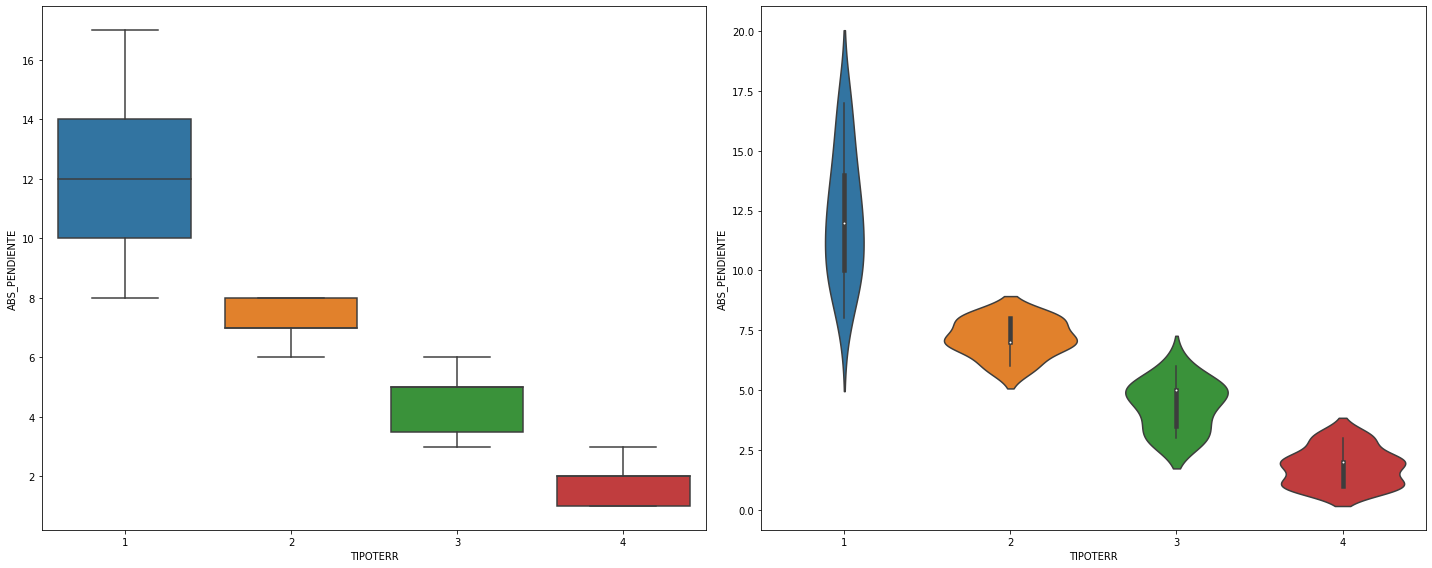

In [12]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.boxplot(data = df_propiedades, x= "TIPOTERR" , y = "ABS_PENDIENTE", ax=ax[0])
sns.violinplot(data = df_propiedades, x= "TIPOTERR" , y = "ABS_PENDIENTE", ax=ax[1])
fig.tight_layout()

# Comportamiento de las variables Categoricas

<AxesSubplot:xlabel='ESTADO', ylabel='mink_dem'>

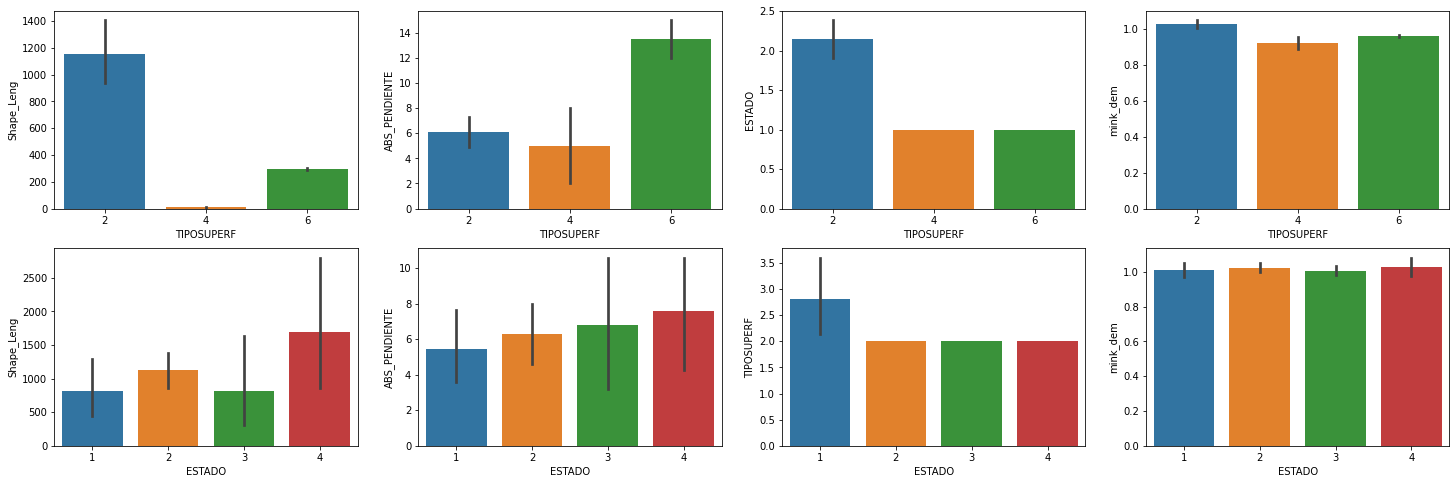

In [13]:
# Comportamiento de las variables Categoricas
fig,ax=plt.subplots(2,4,figsize=(25,8))
sns.barplot(data = df_propiedades,x='TIPOSUPERF', y='Shape_Leng', ax=ax[0,0])
sns.barplot(data = df_propiedades,x='TIPOSUPERF', y='ABS_PENDIENTE', ax=ax[0,1])
sns.barplot(data = df_propiedades,x='TIPOSUPERF', y='ESTADO', ax=ax[0,2])
sns.barplot(data = df_propiedades,x='TIPOSUPERF', y='mink_dem', ax=ax[0,3])

sns.barplot(data = df_propiedades,x='ESTADO', y='Shape_Leng', ax=ax[1,0])
sns.barplot(data = df_propiedades,x='ESTADO', y='ABS_PENDIENTE', ax=ax[1,1])
sns.barplot(data = df_propiedades,x='ESTADO', y='TIPOSUPERF', ax=ax[1,2])
sns.barplot(data = df_propiedades,x='ESTADO', y='mink_dem', ax=ax[1,3])

Las variables categoricas que no resultan excluidas por los primeros analsis no presentan tendencias marcadas en terminos de correlaciones entre sus categorias

## Variables Seleccionadas

Dentro de las variables del modelo de datos para la capa PROPIEDADES del SINC encontramos variables numericas continuas y categóricas cuya utilidad fue evaluada en el analisis exploratorio de los datos y su porterior limpieaza, de tal modo que solo se tomaran en cuenta variables continuas: Longitud, Pendiente, y ***dimension fractal***. A su vez Las variables categoricas seran: Tipo de superficie y Estado.


In [14]:
#lista de las variables Seleccionadas en el dataframe Propiedades

#df = df_propiedades[['Shape_Leng','ABS_PENDIENTE','mink_dem','TIPOSUPERF', 'ESTADO']]

##BORRAR


# Transformacion YEO JOHNSON

PowerTransformer(standardize=False)
[ 0.14450816  0.36350115 -7.04383152]
['ABS_PENDIENTE' 'Shape_Leng' 'mink_dem']
0.8651424216684463
10.57454940680183
0.0002461294875594044


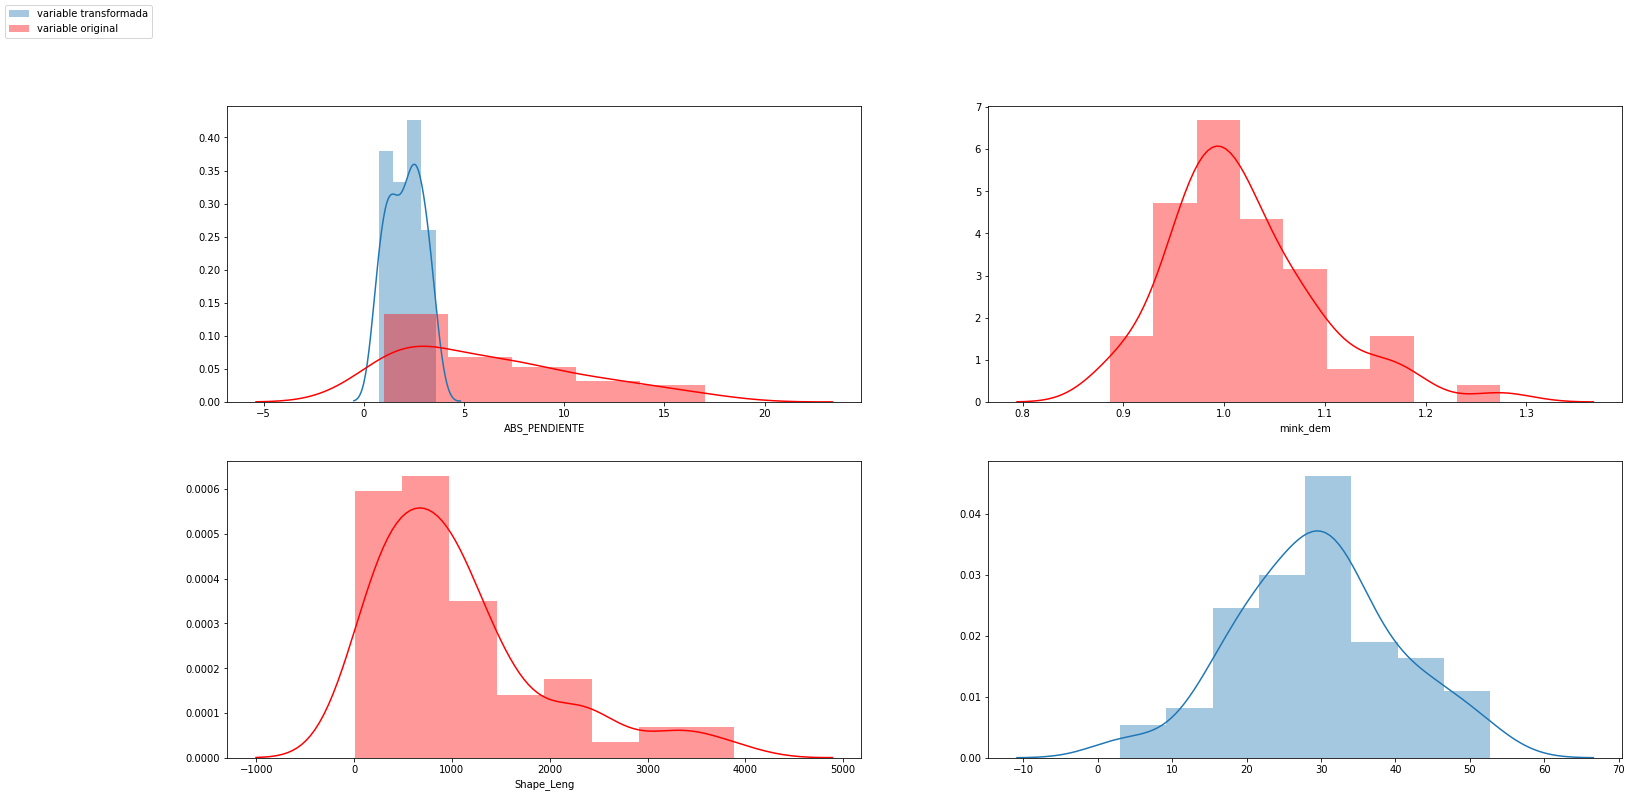

In [15]:
## TRANSFFORMACION YEO JOHNSON //  https://machinelearningmastery.com/power-transforms-with-scikit-learn/

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)
d=df_propiedades[['ABS_PENDIENTE','Shape_Leng','mink_dem']]
print(pt.fit(d))

print(pt.lambdas_) # parametros de la transformacion
print(pt.feature_names_in_) # columnas transformadas
i = pt.transform(d)
#print(i)

print(pt.transform(d)[:,0].std())
print(pt.transform(d)[:,1].std())
print(pt.transform(d)[:,2].std())


fig,ax=plt.subplots(2,2,figsize=(25,12))

sns.distplot(pt.transform(d)[:,0],ax=ax[0,0])
sns.distplot(df_propiedades.ABS_PENDIENTE,ax=ax[0,0], color ='r')

sns.distplot(df_propiedades.Shape_Leng,ax=ax[1,0], color ='r')
sns.distplot(pt.transform(d)[:,1],ax=ax[1,1])

#sns.distplot(pt.transform(d)[:,2],ax=ax[0,1])
sns.distplot(df_propiedades.mink_dem,ax=ax[0,1], color ='r')
fig.legend(labels=['variable transformada','variable original'],loc='upper left')


- La variable ABS_PENDIENTE ve reducida su varianza al aplicarle la transformacion de Yeo Johnson y su forma original no se ve afactafa salvo escala, por tanto no se considera modificar las informacion original.
- La variable Shape_Leng mejora en el centrado de susdatos y reduciendo su rango
- la variable de dimension fractal no se ve afectada significativamente  tanto en forma, escala y varianza los cambios son minimos sin embargo su meia se desplaza a la izquierda sin mayor efecto con respecto a las medidas de dispersion. Considerando lo anterior no se considera modificar las informacion original.

In [16]:
df_propiedades = df_propiedades.assign(yj_Shape_Leng= i[:,1])
#df_propiedades = df_propiedades.assign(yj_ABS_PENDIENTE= i[:,0])
#df_propiedades = df_propiedades.assign(yj_mink_dem= i[:,2])

# Analisi de Outliers

<AxesSubplot:ylabel='mink_dem'>

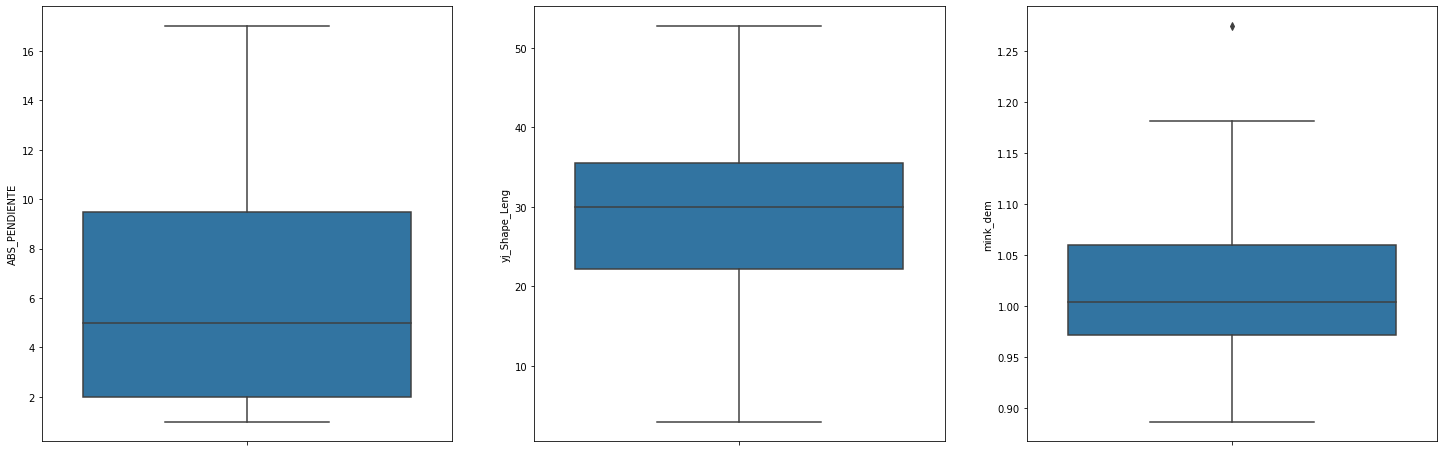

In [17]:
fig,ax=plt.subplots(1,3,figsize=(25,8))
#(df[df.Shape_Leng >0])

sns.boxplot(data = df_propiedades,y ='ABS_PENDIENTE', ax=ax[0])
sns.boxplot(data = df_propiedades,y ='yj_Shape_Leng', ax=ax[1])
sns.boxplot(data = df_propiedades,y ='mink_dem', ax=ax[2])


#sns.violinplot(data = l,y ='yj_mink_dem', ax=ax[3])
#sns.scatterplot(data= df , x='yj_ABS_PENDIENTE' ,y='yj_Shape_Leng')
#sns.scatterplot(data= df , x='yj_mink_dem' ,y='yj_Shape_Leng')

# En caso de eliminar Outliers

In [18]:
# calculate interquartile range // https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
l=df_propiedades.ABS_PENDIENTE

q25, q75 = np.percentile(l, 25), np.percentile(l, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in l if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in l if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
print('{}%'.format(round((len(outliers)*100/len(outliers_removed)),5)))

#outliers

Percentiles: 25th=2.000, 75th=9.500, IQR=7.500
Identified outliers: 0
Non-outlier observations: 59
0.0%


In [19]:
#df_propiedades.loc[df_propiedades['ABS_PENDIENTE'].isin(outliers)]

# En caso de remplazar con limites superiores o inferiores

In [20]:
#//https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

def check_outliers_iqr(dataframe, col_name):
    lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
        return True
    else: 
        return False

def replace_with_thresholds_iqr(dataframe,cols, th1=0.25, th3=0.75, replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != 'Outcome':
            outliers_ = check_outliers_iqr(dataframe,col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name, th1, th3)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace: 
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_iqr(dataframe, col_name)
            data.append([outliers_, outliers_status, count, col_name, lower_limit, upper_limit ])
    table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using IQR")
    print(table)

q = pd.DataFrame(df_propiedades.select_dtypes(exclude=['object','geometry']))
type(q)    

replace_with_thresholds_iqr(q, q.columns)

Removing Outliers using IQR
=======================  ==========  =======  =============  =============  =============
Outliers (Previously)    Outliers      Count  Column           Lower Limit    Upper Limit
=======================  ==========  =======  =============  =============  =============
True                     True              4  LONGITUD             -1078.8        2961.39
False                    False                PENDIENTE           -21.5539          23.77
True                     True              2  ANCHOCARR              2.675          4.875
False                    False                ANCHOBERMA                 0              0
False                    False                ANCHOCUNET                 0              0
False                    False                ANCHOSEPAR                 0              0
False                    False                TIPOTERR                -3.5            8.5
True                     True              4  TIPOSUPERF                

In [21]:

x = df_propiedades['yj_Shape_Leng']
y = df_propiedades['ABS_PENDIENTE']
z = df_propiedades['mink_dem']
w = df_propiedades['TIPOSUPERF']
v = df_propiedades['ESTADO']

fig = px.scatter_3d(df_propiedades, x = x, y= y, z=z,
              color=w.astype(str),symbol=v.astype(str))
fig.show()

In [22]:
df_propiedades.describe()

LONGITUD  PENDIENTE  ANCHOCARR  ANCHOBERMA  ANCHOCUNET  ANCHOSEPAR  \
count    59.000000  59.000000  59.000000        59.0        59.0        59.0   
mean   1114.321029   0.791989   3.864407         0.0         0.0         0.0   
std     922.910929   7.756342   0.452488         0.0         0.0         0.0   
min       6.670280 -16.734100   3.000000         0.0         0.0         0.0   
25%     436.267502  -4.557415   3.500000         0.0         0.0         0.0   
50%     945.197998  -0.860972   3.700000         0.0         0.0         0.0   
75%    1446.315002   6.773570   4.050000         0.0         0.0         0.0   
max    3996.840088  16.846201   5.000000         0.0         0.0         0.0   

        TIPOTERR  TIPOSUPERF     ESTADO  NUMCARR   Shape_Leng   mink_dem  \
count  59.000000    59.00000  59.000000     59.0    59.000000  59.000000   
mean    2.576271     2.20339   2.067797      1.0  1086.079817   1.018546   
std     1.234607     0.80472   0.907144      0.0   898.574927   0.075081   
min     1.000000     2.00000   1.000000      1.0     6.559331   0.886868   
25%     1.000000     2.00000   1.500000      1.0   431.800747   0.971266   
50%     3.000000     2.00000   2.000000      1.0   912.536723   1.003570   
75%     4.000000     2.00000   2.000000      1.0  1399.408143   1.060007   
max     4.000000     6.00000   4.000000      1.0  3882.214654   1.274071   

       mink_dem_L  mink_dem_1  mink_dem_f  ABS_PENDIENTE  yj_Shape_Leng  
count   57.000000        59.0   52.000000      59.000000      59.000000  
mean     1.018962         0.0    1.021941       6.288136      29.367625  
std      0.076371         0.0    0.077844       4.541194      10.665320  
min      0.886868         0.0    0.886868       1.000000       2.987815  
25%      0.969631         0.0    0.972529       2.000000      22.237555  
50%      1.003570         0.0    1.010825       5.000000      30.037475  
75%      1.063016         0.0    1.064491       9.500000      35.539177  
max      1.274071         0.0    1.274071      17.000000      52.733188

# Division Prueba - Entrenamiento / Train - Test

In [23]:
# create random train/test split

indices =np.arange(start=0, stop=df_propiedades.shape[0], step=1)
num_training_instances = int(.8 * df_propiedades.shape[0])
np.random.seed(0)
np.random.shuffle(indices)
train_indices = indices[:num_training_instances]
test_indices = indices[num_training_instances:]

df_train, df_test = df_propiedades.iloc[train_indices], df_propiedades.iloc[test_indices]

In [24]:
print(df_train.shape)
df_train.describe()

(47, 23)


LONGITUD  PENDIENTE  ANCHOCARR  ANCHOBERMA  ANCHOCUNET  ANCHOSEPAR  \
count    47.000000  47.000000  47.000000        47.0        47.0        47.0   
mean   1115.215417  -0.046163   3.855319         0.0         0.0         0.0   
std     977.804621   6.881109   0.472187         0.0         0.0         0.0   
min       6.670280 -16.734100   3.000000         0.0         0.0         0.0   
25%     436.267502  -4.557415   3.500000         0.0         0.0         0.0   
50%     935.780029  -0.973650   3.700000         0.0         0.0         0.0   
75%    1323.355042   4.560640   4.150000         0.0         0.0         0.0   
max    3996.840088  16.846201   5.000000         0.0         0.0         0.0   

        TIPOTERR  TIPOSUPERF     ESTADO  NUMCARR   Shape_Leng   mink_dem  \
count  47.000000   47.000000  47.000000     47.0    47.000000  47.000000   
mean    2.765957    2.085106   2.085106      1.0  1087.052519   1.021648   
std     1.183450    0.408059   0.928528      0.0   952.129894   0.078183   
min     1.000000    2.000000   1.000000      1.0     6.559331   0.886868   
25%     2.000000    2.000000   1.500000      1.0   431.800747   0.973198   
50%     3.000000    2.000000   2.000000      1.0   910.157693   1.003570   
75%     4.000000    2.000000   2.000000      1.0  1279.432692   1.060007   
max     4.000000    4.000000   4.000000      1.0  3882.214654   1.274071   

       mink_dem_L  mink_dem_1  mink_dem_f  ABS_PENDIENTE  yj_Shape_Leng  
count   47.000000        47.0   42.000000      47.000000      47.000000  
mean     1.021648         0.0    1.024018       5.510638      29.070450  
std      0.078183         0.0    0.081002       4.138222      11.241995  
min      0.886868         0.0    0.886868       1.000000       2.987815  
25%      0.973198         0.0    0.974473       2.000000      22.237555  
50%      1.003570         0.0    1.006977       5.000000      30.006411  
75%      1.060007         0.0    1.061512       8.000000      34.307404  
max      1.274071         0.0    1.274071      17.000000      52.733188

In [25]:
print(df_test.shape)
df_test.describe()

(12, 23)


LONGITUD  PENDIENTE  ANCHOCARR  ANCHOBERMA  ANCHOCUNET  ANCHOSEPAR  \
count    12.000000  12.000000  12.000000        12.0        12.0        12.0   
mean   1110.818008   4.074749   3.900000         0.0         0.0         0.0   
std     702.040830  10.219896   0.381385         0.0         0.0         0.0   
min     297.704010 -13.825900   3.500000         0.0         0.0         0.0   
25%     561.894737  -2.178845   3.675000         0.0         0.0         0.0   
50%    1111.149963   6.155975   3.800000         0.0         0.0         0.0   
75%    1522.665039  12.457725   4.000000         0.0         0.0         0.0   
max    2620.540039  15.388000   4.800000         0.0         0.0         0.0   

        TIPOTERR  TIPOSUPERF     ESTADO  NUMCARR   Shape_Leng   mink_dem  \
count  12.000000   12.000000  12.000000     12.0    12.000000  12.000000   
mean    1.833333    2.666667   2.000000      1.0  1082.270071   1.006396   
std     1.193416    1.556998   0.852803      0.0   682.892257   0.062923   
min     1.000000    2.000000   1.000000      1.0   291.539367   0.891841   
25%     1.000000    2.000000   1.750000      1.0   541.886057   0.963752   
50%     1.000000    2.000000   2.000000      1.0  1092.137991   1.006699   
75%     2.250000    2.000000   2.000000      1.0  1483.501070   1.035935   
max     4.000000    6.000000   4.000000      1.0  2551.692697   1.120377   

       mink_dem_L  mink_dem_1  mink_dem_f  ABS_PENDIENTE  yj_Shape_Leng  
count   10.000000        12.0   10.000000      12.000000      12.000000  
mean     1.006335         0.0    1.013216       9.333333      30.531558  
std      0.069531         0.0    0.065899       4.942089       8.330909  
min      0.891841         0.0    0.891841       1.000000      18.923775  
25%      0.958312         0.0    0.975387       5.750000      24.286839  
50%      1.007822         0.0    1.012824      11.500000      32.237210  
75%      1.058622         0.0    1.058622      12.500000      36.360552  
max      1.120377         0.0    1.120377      15.000000      44.885724

# NORMALIZACION

In [26]:
#df1 = StandardScaler().fit_transform(df)
#data = pd.DataFrame(data= df1,columns= df.columns)

***Variables a Normalizar***

In [27]:
var_a_normalizar = ['ANCHOCARR','TIPOSUPERF','ESTADO','yj_Shape_Leng','ABS_PENDIENTE','mink_dem']

***STANDARD SCALER***

In [28]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
sc = StandardScaler()

sc_fit = sc.fit_transform(df_train[var_a_normalizar])
dfn_train = pd.DataFrame(data= sc_fit,columns= df_train[var_a_normalizar].columns)

print(dfn_train.shape)

(47, 6)


In [29]:
dfn_train.describe()

ANCHOCARR    TIPOSUPERF        ESTADO  yj_Shape_Leng  ABS_PENDIENTE  \
count  4.700000e+01  4.700000e+01  4.700000e+01   4.700000e+01   4.700000e+01   
mean   4.251918e-17 -3.330669e-16 -1.139750e-16   8.149509e-17   2.362177e-17   
std    1.010811e+00  1.010811e+00  1.010811e+00   1.010811e+00   1.010811e+00   
min   -1.830984e+00 -2.108185e-01 -1.181265e+00  -2.345190e+00  -1.101778e+00   
25%   -7.606326e-01 -2.108185e-01 -6.369565e-01  -6.143719e-01  -8.575161e-01   
50%   -3.324920e-01 -2.108185e-01 -9.264821e-02   8.415582e-02  -1.247296e-01   
75%    6.308237e-01 -2.108185e-01 -9.264821e-02   4.708747e-01   6.080569e-01   
max    2.450421e+00  4.743416e+00  2.084585e+00   2.127608e+00   2.806416e+00   

           mink_dem  
count  4.700000e+01  
mean   1.393684e-16  
std    1.010811e+00  
min   -1.742556e+00  
25%   -6.264087e-01  
50%   -2.337331e-01  
75%    4.959322e-01  
max    3.263531e+00

In [30]:
try:
   sc_tf = sc.transform(df_test[var_a_normalizar])
   dfn_test = pd.DataFrame(data= sc_tf, columns= df_test[var_a_normalizar].columns)
   print(dfn_test.shape)
except:
    dfn_test = df_test[var_a_normalizar]
    print("Se tienen en cuenta todos los datos en el train")

(12, 6)


In [31]:
dfn_test.describe()

ANCHOCARR  TIPOSUPERF     ESTADO  yj_Shape_Leng  ABS_PENDIENTE  \
count  12.000000   12.000000  12.000000      12.000000      12.000000   
mean    0.095648    1.440593  -0.092648       0.131374       0.933740   
std     0.816432    3.856867   0.928375       0.749064       1.207165   
min    -0.760633   -0.210819  -1.181265      -0.912327      -1.101778   
25%    -0.386010   -0.210819  -0.364802      -0.430113       0.058467   
50%    -0.118422   -0.210819  -0.092648       0.284736       1.462974   
75%     0.309719   -0.210819  -0.092648       0.655481       1.707237   
max     2.022281    9.697651   2.084585       1.422012       2.317892   

        mink_dem  
count  12.000000  
mean   -0.197198  
std     0.813529  
min    -1.678267  
25%    -0.748541  
50%    -0.193274  
75%     0.184703  
max     1.276450

***MIN_MAX SCALER***

In [32]:
#//https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
from sklearn.preprocessing import MinMaxScaler

# Standardizing the features
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_train[var_a_normalizar])
dfn_train_1 = pd.DataFrame(data= mms_fit,columns= df_train[var_a_normalizar].columns)
print(dfn_train_1.shape)

(47, 6)


In [33]:
dfn_train_1.describe()

ANCHOCARR  TIPOSUPERF     ESTADO  yj_Shape_Leng  ABS_PENDIENTE  \
count  47.000000   47.000000  47.000000      47.000000      47.000000   
mean    0.427660    0.042553   0.361702       0.524323       0.281915   
std     0.236093    0.204030   0.309509       0.225991       0.258639   
min     0.000000    0.000000   0.000000       0.000000       0.000000   
25%     0.250000    0.000000   0.166667       0.386965       0.062500   
50%     0.350000    0.000000   0.333333       0.543138       0.250000   
75%     0.575000    0.000000   0.333333       0.629598       0.437500   
max     1.000000    1.000000   1.000000       1.000000       1.000000   

        mink_dem  
count  47.000000  
mean    0.348087  
std     0.201916  
min     0.000000  
25%     0.222958  
50%     0.301398  
75%     0.447153  
max     1.000000

In [34]:
try:
    mms_tf=mms.transform(df_test[var_a_normalizar])
    dfn_test_1 = pd.DataFrame(data= mms_tf,columns= df_test[var_a_normalizar].columns)
    print(dfn_test_1.shape)

except:
    dfn_test_1 = df_test[var_a_normalizar]
    print("Se tienen en cuenta todos los datos en el train")

(12, 6)


In [35]:
dfn_test_1.describe()

ANCHOCARR  TIPOSUPERF     ESTADO  yj_Shape_Leng  ABS_PENDIENTE  \
count  12.000000   12.000000  12.000000      12.000000      12.000000   
mean    0.450000    0.333333   0.333333       0.553695       0.520833   
std     0.190693    0.778499   0.284268       0.167471       0.308881   
min     0.250000    0.000000   0.000000       0.320351       0.000000   
25%     0.337500    0.000000   0.250000       0.428161       0.296875   
50%     0.400000    0.000000   0.333333       0.587982       0.656250   
75%     0.500000    0.000000   0.333333       0.670871       0.718750   
max     0.900000    2.000000   1.000000       0.842247       0.875000   

        mink_dem  
count  12.000000  
mean    0.308696  
std     0.162508  
min     0.012842  
25%     0.198561  
50%     0.309480  
75%     0.384983  
max     0.603067

Con el proceso anterior se establece una base de informacion lista para el analisis Exploratorio de los datos.

 Sin embargo, desde ya se pueden perfilar varibles que resultaran de mayor utilidad que otras, por tanto en necesario efectuar un analisis exploratorio de los datos que de herramientas de desicion sobre las variables que aportaran a la propuesta declasificacion de las vias terciaras del SINC.


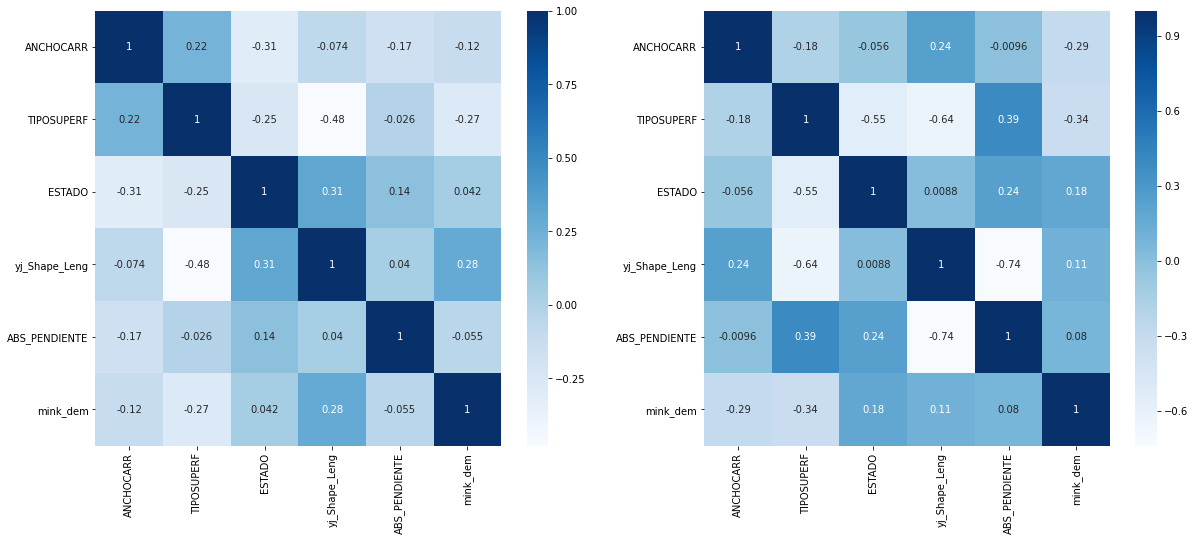

In [36]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))

try:
    sns.heatmap(dfn_train.corr(), annot=True, cmap="Blues",ax=ax[0])
    sns.heatmap(dfn_test.corr(), annot=True, cmap="Blues",ax=ax[1])
except:
    print("Se tienen en cuenta todos los datos en el train")

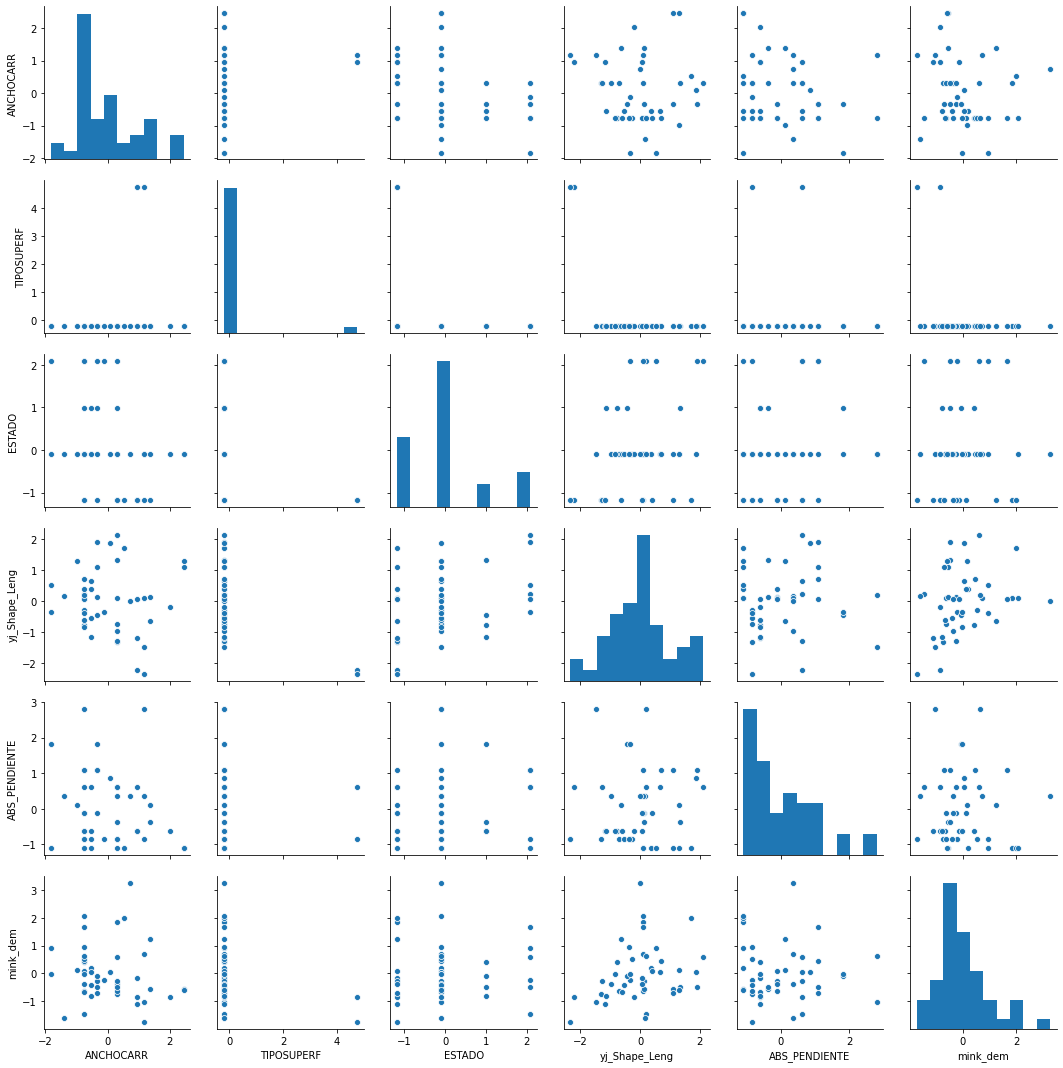

In [37]:
sns.pairplot(dfn_train)

# Division de los datos con y sin la variable de dimension fractal (mink_dem)

In [38]:
#Datos Sin variable de dimension fractal
var_sin_DF = ['ABS_PENDIENTE', 'yj_Shape_Leng']
dfn_train_sin= dfn_train[var_sin_DF]
dfn_test_sin= dfn_test[var_sin_DF]
#dfn_train_sin= dfn_train_1[var_sin_DF]
#dfn_test_sin= dfn_test_1[var_sin_DF]


#Datos Con variable de dimension fractal (mink_dem)
var_con_DF = ['ABS_PENDIENTE', 'mink_dem','yj_Shape_Leng']
dfn_train_DF= dfn_train[var_con_DF]
dfn_test_DF= dfn_test[var_con_DF]
#dfn_train_DF= dfn_train_1[var_con_DF]
#dfn_test_DF= dfn_test_1[var_con_DF]

# Clustering jerarquico

***SIN LA VARIABLE MINK_DEM***

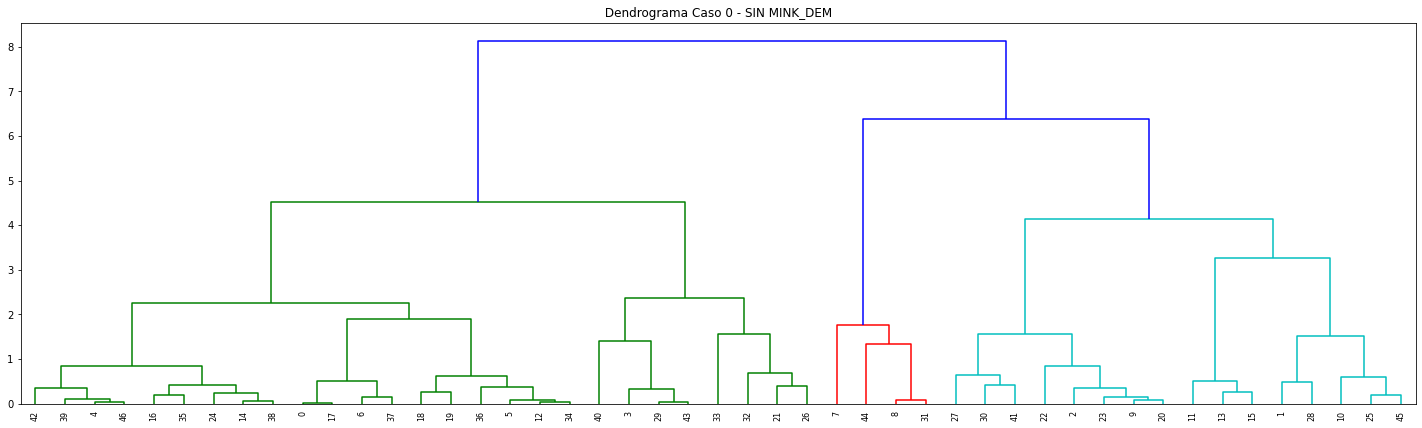

In [39]:
#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
#https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(25, 7))
plt.title(" Dendrograma Caso 0 - SIN MINK_DEM ")
hc_sin =shc.linkage(dfn_train_sin.iloc[:9000,].values, method='ward')
dend_sin = shc.dendrogram(hc_sin)


In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

hc_sin_labels_train = cluster.fit_predict(dfn_train_sin.iloc[:9000,])

# Se crea el Df de Resultados para almacenar los resultados de los algoritmos de agrupamientose agrega la columna con etiquetas de cluster al data frame
resultados_train = pd.DataFrame()
resultados_train = resultados_train.assign (hc_sin = hc_sin_labels_train)
#resultados_train.head()

In [41]:
try:
    hc_sin_labels_test = cluster.fit_predict(dfn_test_sin.iloc[:9000,])

# se agrega la columna con etiquetas de cluster al data frame
    resultados_test = pd.DataFrame()
    resultados_test = resultados_test.assign (hc_sin = hc_sin_labels_test)
except:
    print("Se tienen en cuenta todos los datos en el train")

***CON LA VARIABLE MINK_DEM***

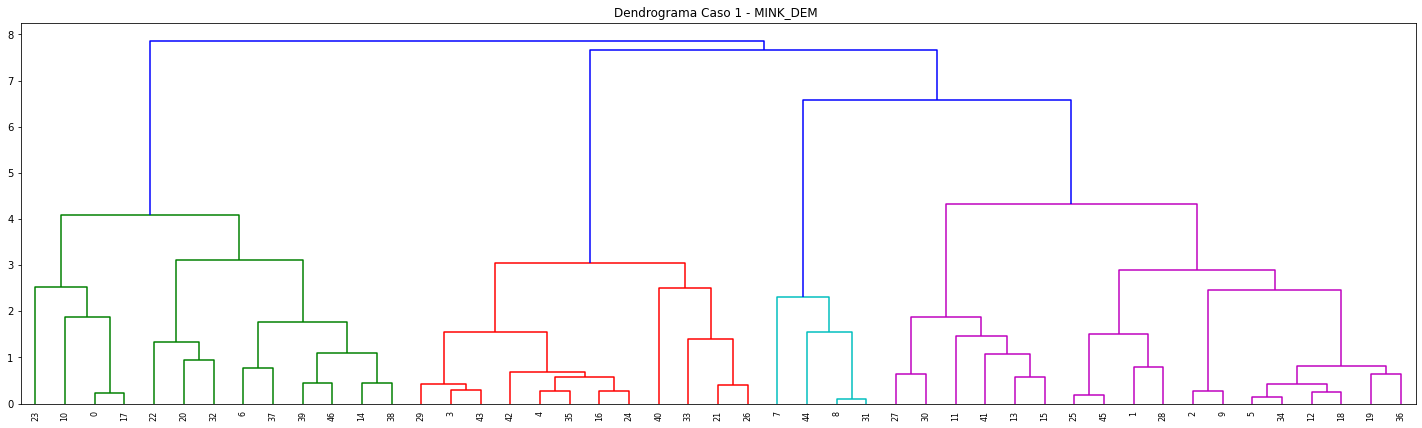

In [42]:
plt.figure(figsize=(25, 7))
plt.title("Dendrograma Caso 1 - MINK_DEM ")
hc_DF =shc.linkage(dfn_train_DF.iloc[:9000,].values, method='ward')
dend_con = shc.dendrogram(hc_DF)


In [43]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

hc_DF_labels_train = cluster.fit_predict(dfn_train_DF.iloc[:9000,])

# se agrega la columna con etiquetas de cluster al data frame
resultados_train = resultados_train.assign (hc_DF = hc_DF_labels_train)
#resultados_train.head()

In [44]:
try:
    hc_DF_labels_test = cluster.fit_predict(dfn_test_DF.iloc[:9000,])

# se agrega la columna con etiquetas de cluster al data frame
    resultados_test = resultados_test.assign (hc_DF = hc_DF_labels_test)
except:
    print("Se tienen en cuenta todos los datos en el train")

***Metricas en el Clustering jerarquico***

In [45]:
hc_sin_labels_train

array([0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 1, 0], dtype=int64)

In [46]:
hc_DF_labels_train

array([1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2,
       1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2,
       0, 0, 1], dtype=int64)

In [47]:
## https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
##https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
## Paper: Evaluation Metrics for Unsupervised Learning Algorithms


#Metricas

print('---------------------------\n','Validacion Externa (Matching) :\n','-------------------------- \n')
## Esternal validation - Matching sets
from sklearn.metrics import accuracy_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print('accuracy Score: ',accuracy_score(hc_sin_labels_train, hc_DF_labels_train ))

from sklearn.metrics import precision_score   ##  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
print('precision Score: ', precision_score(hc_sin_labels_train, hc_DF_labels_train , average='weighted'))

print('---------------------------\n','Validacion Externa :\n','-------------------------- \n')
## Esternal validation - Peer to peer corelation
from sklearn.metrics import jaccard_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score
print('jaccard_score: ',jaccard_score(hc_sin_labels_train, hc_DF_labels_train, average='weighted'))

from sklearn.metrics.cluster import fowlkes_mallows_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score
print('fowlkes_mallows_score (FMI): ',fowlkes_mallows_score(hc_sin_labels_train, hc_DF_labels_train))

from sklearn.metrics.cluster import adjusted_mutual_info_score #   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score
print('* adjusted_mutual_info_score (AMI): ',adjusted_mutual_info_score(hc_sin_labels_train, hc_DF_labels_train))

from sklearn.metrics.cluster import adjusted_rand_score
print('* adjusted_rand_score (ARI): ',adjusted_rand_score(hc_sin_labels_train, hc_DF_labels_train))

from sklearn import metrics
print('Homogeneity, completeness and V-measure: ',metrics.homogeneity_completeness_v_measure(hc_sin_labels_train, hc_DF_labels_train))

###------
# Cuando no es conocida la variable de respuesta - Internal Validation
#https://stats.stackexchange.com/questions/21807/evaluation-measures-of-goodness-or-validity-of-clustering-without-having-truth
print('---------------------------\n','Validacion Interna:\n','-------------------------- \n')

print('* Silhouette Coefficient: - SIN',metrics.silhouette_score(dfn_train_sin.iloc[:9000,], resultados_train.hc_sin, metric='euclidean'))
print('* Silhouette Coefficient: - CON',metrics.silhouette_score(dfn_train_DF.iloc[:9000,], resultados_train.hc_DF, metric='euclidean'))

print('* Calinski-Harabasz Index -SIN: ',metrics.calinski_harabasz_score(dfn_train_sin.iloc[:9000,], resultados_train.hc_sin))
print('* Calinski-Harabasz Index - CON: ',metrics.calinski_harabasz_score(dfn_train_DF.iloc[:9000,], resultados_train.hc_DF))

print('* Davies-Bouldin index - SIN: ', metrics.davies_bouldin_score(dfn_train_sin.iloc[:9000,], resultados_train.hc_sin))
print('* Davies-Bouldin index: - CON', metrics.davies_bouldin_score(dfn_train_DF.iloc[:9000,], resultados_train.hc_DF))

#Cohen’s kappa

---------------------------
 Validacion Externa (Matching) :
 -------------------------- 

accuracy Score:  0.2127659574468085
precision Score:  0.2614194316321976
---------------------------
 Validacion Externa :
 -------------------------- 

jaccard_score:  0.13462642256308757
fowlkes_mallows_score (FMI):  0.46106248638574066
* adjusted_mutual_info_score (AMI):  0.22530467599357562
* adjusted_rand_score (ARI):  0.11333979569010513
Homogeneity, completeness and V-measure:  (0.288860891136504, 0.24402673588323562, 0.2645577672072788)
---------------------------
 Validacion Interna:
 -------------------------- 

* Silhouette Coefficient: - SIN 0.37827897355368356
* Silhouette Coefficient: - CON 0.23358380471901388
* Calinski-Harabasz Index -SIN:  28.867456017298394
* Calinski-Harabasz Index - CON:  16.404982215782802
* Davies-Bouldin index - SIN:  0.9170717059314205
* Davies-Bouldin index: - CON 1.2607195531652895


<AxesSubplot:xlabel='hc_DF'>

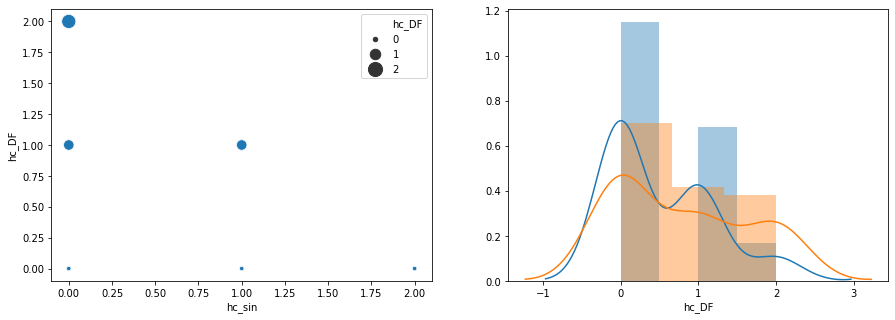

In [48]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data =resultados_train,x='hc_sin',y='hc_DF',ax=ax[0],size = 'hc_DF',sizes=(20, 200))
sns.distplot(resultados_train.hc_sin,ax=ax[1])
sns.distplot(resultados_train.hc_DF,ax=ax[1])

# Cluster - KMeans

***SIN LA VARIABLE MINK_DEM***

 Determinacion del Numero de Clusters  -Elbow Method

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<function matplotlib.pyplot.show(close=None, block=None)>

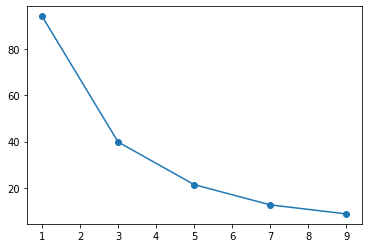

In [49]:
clusters_range = range(1,10,2)
inertias = []

for c in clusters_range:
    kmeans = KMeans(init='k-means++',n_clusters=c,n_init=100,random_state = 0).fit(dfn_train_sin)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range, inertias, marker = 'o')
plt.show


Ajuste del modelo a X clusters

In [50]:
kmeans = KMeans(init='k-means++',n_clusters=3,n_init=100,random_state = 1).fit(dfn_train_sin)
km_sin_labels_train = kmeans.labels_

resultados_train = resultados_train.assign (km_sin = km_sin_labels_train)
try:
    km_sin_labels_test = kmeans.predict(dfn_test_sin)
    resultados_test = resultados_test.assign (km_sin = km_sin_labels_test)
except:
    print("Se tienen en cuenta todos los datos en el train")

***CON LA VARIABLE MINK_DEM***

 Determinacion del Numero de Clusters  -Elbow Method

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<function matplotlib.pyplot.show(close=None, block=None)>

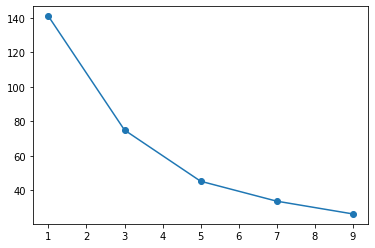

In [51]:
clusters_range = range(1,10,2)
inertias = []

for c in clusters_range:
    kmeans = KMeans(init='k-means++',n_clusters=c,n_init=100,random_state = 0).fit(dfn_train_DF)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range, inertias, marker = 'o')
plt.show

Ajuste del modelo a X clusters

In [52]:
kmeans = KMeans(init='k-means++',n_clusters=3,n_init=100,random_state = 1).fit(dfn_train_DF)
km_DF_labels_train = kmeans.labels_

resultados_train = resultados_train.assign (km_DF = km_DF_labels_train)

try:
    km_DF_labels_test = kmeans.predict(dfn_test_DF)
    resultados_test = resultados_test.assign (km_DF = km_DF_labels_test)
except:
    print("Se tienen en cuenta todos los datos en el train")

***Metricas en el K means***

In [53]:
km_sin_labels_train

array([0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       1, 2, 0])

In [54]:
km_DF_labels_train

array([2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0,
       1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       1, 0, 2])

In [55]:
## https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
##https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
## Paper: Evaluation Metrics for Unsupervised Learning Algorithms


#Metricas

print('---------------------------\n','Validacion Externa (Matching) :\n','-------------------------- \n')
## Esternal validation - Matching sets
from sklearn.metrics import accuracy_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print('accuracy Score: ',accuracy_score(km_sin_labels_train, km_DF_labels_train ))

from sklearn.metrics import precision_score   ##  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
print('precision Score: ', precision_score(km_sin_labels_train, km_DF_labels_train , average='weighted'))

print('---------------------------\n','Validacion Externa :\n','-------------------------- \n')
## Esternal validation - Peer to peer corelation
from sklearn.metrics import jaccard_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score
print('jaccard_score: ',jaccard_score(km_sin_labels_train, km_DF_labels_train, average='weighted'))

from sklearn.metrics.cluster import fowlkes_mallows_score #  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score
print('fowlkes_mallows_score (FMI): ',fowlkes_mallows_score(km_sin_labels_train, km_DF_labels_train))

from sklearn.metrics.cluster import adjusted_mutual_info_score #   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score
print('* adjusted_mutual_info_score (AMI): ',adjusted_mutual_info_score(km_sin_labels_train, km_DF_labels_train))

from sklearn.metrics.cluster import adjusted_rand_score
print('* adjusted_rand_score (ARI): ',adjusted_rand_score(km_sin_labels_train, km_DF_labels_train))

from sklearn import metrics
print('Homogeneity, completeness and V-measure: ',metrics.homogeneity_completeness_v_measure(km_sin_labels_train, km_DF_labels_train))

###------
# Cuando no es conocida la variable de respuesta - Internal Validation
#https://stats.stackexchange.com/questions/21807/evaluation-measures-of-goodness-or-validity-of-clustering-without-having-truth
print('---------------------------\n','Validacion Interna:\n','-------------------------- \n')

print('* Silhouette Coefficient: - SIN',metrics.silhouette_score(dfn_train_sin, resultados_train.km_sin, metric='euclidean'))
print('* Silhouette Coefficient: - CON',metrics.silhouette_score(dfn_train_DF, resultados_train.km_DF, metric='euclidean'))

print('* Calinski-Harabasz Index -SIN: ',metrics.calinski_harabasz_score(dfn_train_sin, resultados_train.km_sin))
print('* Calinski-Harabasz Index - CON: ',metrics.calinski_harabasz_score(dfn_train_DF, resultados_train.km_DF))

print('* Davies-Bouldin index - SIN: ', metrics.davies_bouldin_score(dfn_train_sin, resultados_train.km_sin))
print('* Davies-Bouldin index: - CON', metrics.davies_bouldin_score(dfn_train_DF, resultados_train.km_DF))

#Cohen’s kappa

---------------------------
 Validacion Externa (Matching) :
 -------------------------- 

accuracy Score:  0.5531914893617021
precision Score:  0.5138856415452161
---------------------------
 Validacion Externa :
 -------------------------- 

jaccard_score:  0.38525835866261393
fowlkes_mallows_score (FMI):  0.5448007773706958
* adjusted_mutual_info_score (AMI):  0.2445950453337642
* adjusted_rand_score (ARI):  0.2401237171376353
Homogeneity, completeness and V-measure:  (0.2771885942637656, 0.2876422303644148, 0.28231867670498395)
---------------------------
 Validacion Interna:
 -------------------------- 

* Silhouette Coefficient: - SIN 0.36482746634205065
* Silhouette Coefficient: - CON 0.32105572959181633
* Calinski-Harabasz Index -SIN:  29.954308805801173
* Calinski-Harabasz Index - CON:  19.30806752611965
* Davies-Bouldin index - SIN:  0.940710568043075
* Davies-Bouldin index: - CON 1.1028632470636976


<AxesSubplot:xlabel='km_DF'>

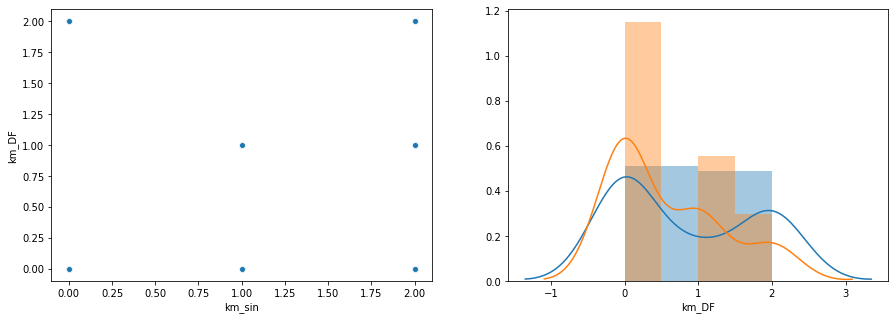

In [56]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data =resultados_train,x='km_sin',y='km_DF',ax=ax[0])
sns.distplot(resultados_train.km_sin,ax=ax[1])
sns.distplot(resultados_train.km_DF,ax=ax[1])

# *** Union de los datos al DataFrame original*** 

In [57]:
print(df_train.shape)
print(resultados_train.shape)
print(df_test.shape)
print(resultados_test.shape)

(47, 23)
(47, 4)
(12, 23)
(12, 4)


In [58]:
a = df_train.append(df_test,ignore_index=True)
b = resultados_train.append(resultados_test,ignore_index=True)
c = pd.concat([a,b],axis=1)
print(type(a),a.shape,type(b),b.shape)
print(type(c),c.shape)

<class 'geopandas.geodataframe.GeoDataFrame'> (59, 23) <class 'pandas.core.frame.DataFrame'> (59, 4)
<class 'geopandas.geodataframe.GeoDataFrame'> (59, 27)


In [59]:
c.head()

CODIGOVIA       FECHA     LONGITUD  PENDIENTE  ANCHOCARR  ANCHOBERMA  \
0        SACH01  2018-04-11   952.971985  -0.860972        4.0         0.0   
1    6008SACH13  2018-04-02  2445.709961  -6.210870        3.4         0.0   
2  52100SACH06B  2018-04-17  1044.050049   7.862090        3.5         0.0   
3        SACH02  2018-04-11   159.509003   2.401170        4.0         0.0   
4    6008SACH09  2018-04-11   595.935974  -1.595810        3.8         0.0   

   ANCHOCUNET  ANCHOSEPAR   OBS  TIPOTERR  ...  mink_dem_2  mink_dem_3  \
0         0.0         0.0  None         4  ...        None        None   
1         0.0         0.0  None         2  ...        None        None   
2         0.0         0.0  None         2  ...        None        None   
3         0.0         0.0  None         4  ...        None        None   
4         0.0         0.0  None         4  ...        None        None   

   mink_dem_f                                           geometry  \
0    1.164023  MULTILINESTRING Z ((-73.54406 5.58824 2165.099...   
1    1.032482  LINESTRING Z (-73.51545 5.55643 2693.93596, -7...   
2    0.907944  LINESTRING Z (-73.53661 5.54107 2582.30818, -7...   
3    0.964479  LINESTRING Z (-73.54705 5.58727 2167.75371, -7...   
4    1.003570  LINESTRING Z (-73.54281 5.58883 2163.89309, -7...   

   ABS_PENDIENTE  yj_Shape_Leng  hc_sin hc_DF km_sin  km_DF  
0            1.0      30.281162       0     1      0      2  
1            6.0      43.578539       1     0      2      1  
2            8.0      31.469832       1     0      2      0  
3            2.0      14.493382       0     2      0      0  
4            2.0      25.164759       0     2      0      0  

[5 rows x 27 columns]

In [60]:
fig = px.scatter(c, x="ABS_PENDIENTE", y="mink_dem", color=c['km_sin'].astype(str), title = "K means - sin Dimension Fractal")
#fig = px.scatter(c, x="Shape_Leng", y="mink_dem", color='km_DF')
#fig = px.scatter(c, x="ABS_PENDIENTE", y="Shape_Leng", color='km_DF')
fig.show()
fig = px.scatter(c, x="ABS_PENDIENTE", y="mink_dem", color=c['km_DF'].astype(str), title = "K means - con Dimension Fractal")
fig.show()


In [61]:
import plotly.express as px

x = c['ABS_PENDIENTE']
y = c['yj_Shape_Leng']
z = c['mink_dem']
o = c['km_sin']
p = c['km_DF']


fig = px.scatter_3d(df_propiedades, x = x, y= y, z=z,
              color=o.astype(str), title="K means - sin Dimension Fractal")
fig.show()


fig = px.scatter_3d(df_propiedades, x = x, y= y, z=z,
              color=p.astype(str), title="K means - con Dimension Fractal")
fig.show()

In [62]:
fig = px.parallel_coordinates(c[['Shape_Leng','ABS_PENDIENTE','mink_dem']], color=c['km_DF'],
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=1)
fig.show()

In [63]:
#c['random'] = np.random.randint(0, 3,size = len(c))
#c['random']=c['random']

# Validacion de la Utilidad de la clusterización con Dimension Fractal

In [64]:
#Resutltados de la clusterizacion
#c.to_file('C:\\Users\\USUARIO\\Documents\\trabajo_Grado\\RESULTADOS\\SACHICA\\Clusters_sachica.shp')

#c=geopandas.read_file('C:\\Users\\USUARIO\\Documents\\trabajo_Grado\\RESULTADOS\\SACHICA\\Clusters_sachica.shp')

Ttest_indResult(statistic=-0.36650386086444897, pvalue=0.7149106833360466)

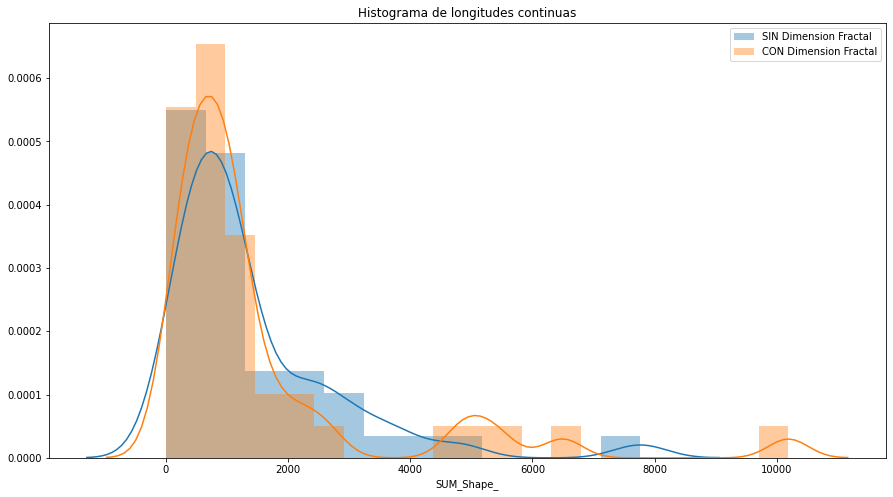

In [65]:
km_DF= geopandas.read_file('C:\\Users\\USUARIO\\Documents\\trabajo_Grado\\RESULTADOS\\SACHICA\\continuidad_km_DF.shp')
km_sin= geopandas.read_file('C:\\Users\\USUARIO\\Documents\\trabajo_Grado\\RESULTADOS\\\SACHICA\continuidad_km_sin.shp')

a = km_DF.SUM_Shape_
b = km_sin.SUM_Shape_

plt.figure(figsize=(15,8))
sns.distplot(a).set(title='Histograma de longitudes continuas')
sns.distplot(b)
plt.legend(labels=['SIN Dimension Fractal','CON Dimension Fractal'])

from scipy import stats
stats.ttest_ind(a, b)

# Interpretacion de los Cluster

In [66]:
#Estadisticas descriptivas por Cluster
#c[c.km_DF==0].describe()
#c[c.km_DF==1].describe()
#c[c.km_DF==2].describe()

In [67]:
c.columns

Index(['CODIGOVIA', 'FECHA', 'LONGITUD', 'PENDIENTE', 'ANCHOCARR',
       'ANCHOBERMA', 'ANCHOCUNET', 'ANCHOSEPAR', 'OBS', 'TIPOTERR',
       'TIPOSUPERF', 'ESTADO', 'NUMCARR', 'Shape_Leng', 'mink_dem',
       'mink_dem_L', 'mink_dem_1', 'mink_dem_2', 'mink_dem_3', 'mink_dem_f',
       'geometry', 'ABS_PENDIENTE', 'yj_Shape_Leng', 'hc_sin', 'hc_DF',
       'km_sin', 'km_DF'],
      dtype='object')

<AxesSubplot:xlabel='cluster', ylabel='mink_dem'>

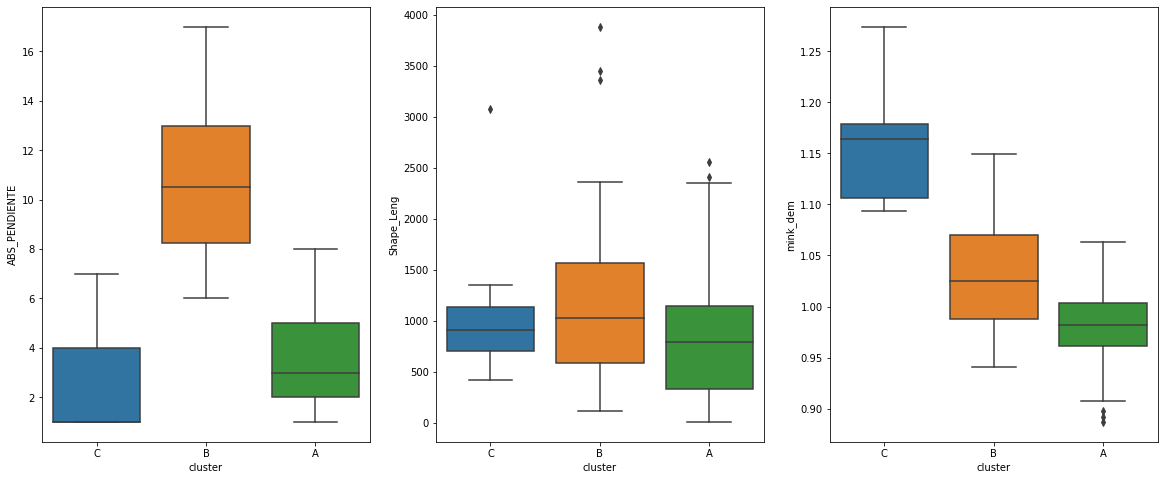

In [68]:
fig,ax=plt.subplots(1,3,figsize=(20,8))

c['cluster']= c['km_DF'].replace([0,1,2],['A','B','C'])
#'km_DF'

sns.boxplot(data = c, x = 'cluster', y = 'ABS_PENDIENTE' ,ax=ax[0])
sns.boxplot(data = c, x = 'cluster', y = 'Shape_Leng' ,ax=ax[1])
sns.boxplot(data = c, x = 'cluster', y = 'mink_dem' ,ax=ax[2])

#sns.barplot(data = clustered_data, x = 'Cluster', y = 'TIPOSUPERF' ,ax=ax[1])
#sns.barplot(data = clustered_data, x = 'Cluster', y = 'ESTADO' ,ax=ax[2])


In [69]:
c[['Shape_Leng', 'mink_dem','ABS_PENDIENTE','cluster']].groupby(['cluster']).mean().round(2)

Shape_Leng  mink_dem  ABS_PENDIENTE
cluster                                     
A            877.81      0.98           3.67
B           1347.90      1.03          11.00
C           1155.82      1.16           2.71

In [70]:
c[['Shape_Leng', 'mink_dem','ABS_PENDIENTE','cluster']].groupby(['cluster']).std().round(2)

Shape_Leng  mink_dem  ABS_PENDIENTE
cluster                                     
A            719.57      0.04           2.19
B           1072.77      0.06           3.32
C            894.86      0.06           2.63

In [71]:
#"""
t = geopandas.read_file(data_dir + '\SACHICA\sachica_area.shp')
m =t.explore(color='salmon', tooltip=False)


#c[c.km_DF==2]
c.explore( m=m, column="cluster", # make choropleth based on "BoroName" column
     tooltip=['mink_dem','ABS_PENDIENTE'], # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="Stamen Terrain", # use "CartoDB positron" tiles
     cmap =['green', 'darkorange', 'royalblue']#{'C':"blue",'B':"orange", 'A':"green"} # use "Set1" matplotlib colormap
     #,style_kwds=dict(color="black") # use black outline
    )
m

# Costo de las intervenciones por Clúster

 | Nombre | Dominio | Obligatoria |
 |-------------|-------|-------| 
 | TIPOSUPERF    |  Número entre 1 y 8 en donde: 1 = Destapado, 2 = Afirmado, 3 = Pavimento asfáltico, 4 = Tratamiento superficial, 5 = Pavimento rígido, 6 = Placa huella, 7 = Pavimento articulado, 8 = Otro  |SI|
 | ESTADO  | Número entre 1 y 5 en donde: 1 = Bueno, 2 = Regular, 3 = Malo, 4 = Pésimo, 5 = Intransitable   |SI|
 

<AxesSubplot:xlabel='cluster', ylabel='ESTADO'>

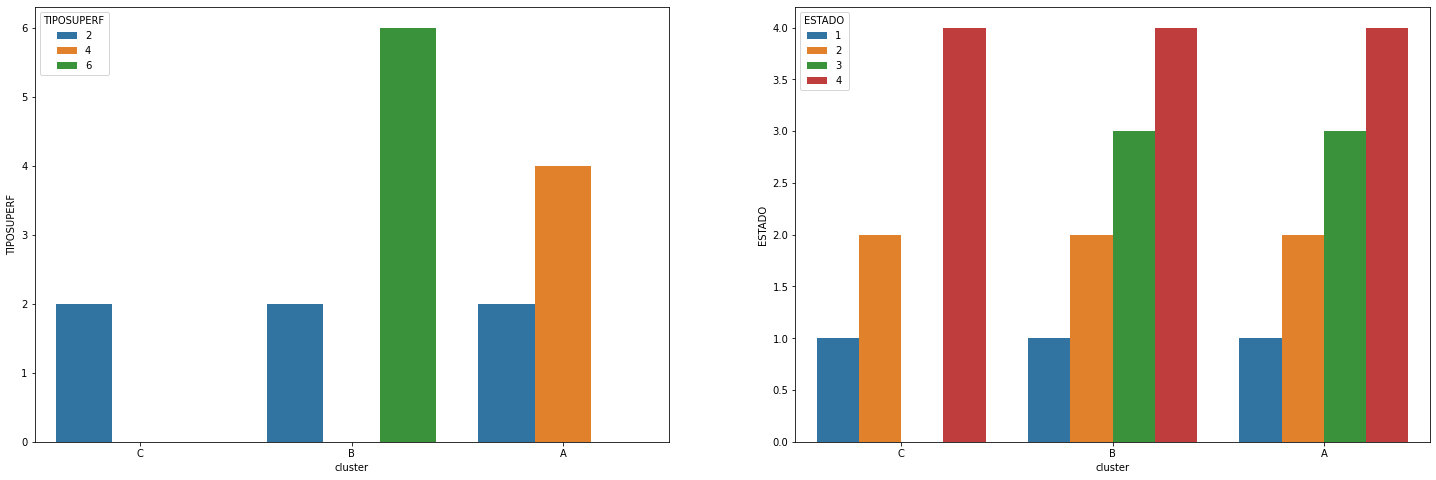

In [72]:
fig,ax=plt.subplots(1,2,figsize=(25,8))
sns.barplot(data = c,x='cluster' , y= 'TIPOSUPERF', ax=ax[0], hue= 'TIPOSUPERF')
sns.barplot(data = c,x='cluster', y='ESTADO', ax=ax[1], hue= 'ESTADO')

In [73]:
costos = c[['Shape_Leng','TIPOSUPERF','cluster']].groupby(['cluster','TIPOSUPERF']).sum().round(2).reset_index()
costos['costo_km_sol']= costos['TIPOSUPERF'].replace([2,4,6], [777691318,1002482022,1257142143])
costos['costo_totales']=(costos.Shape_Leng/1000*costos.costo_km_sol)/1000
pd.options.display.float_format = '{:.0f}'.format
costos

cluster  TIPOSUPERF  Shape_Leng  costo_km_sol  costo_totales
0       A           2       26314     777691318       20464037
1       A           4          20    1002482022          20431
2       B           2       29058     777691318       22597874
3       B           6         596    1257142143         749458
4       C           2        8091     777691318        6292075

In [74]:
v = costos[['cluster','costo_totales']].groupby(['cluster']).sum().round(0).reset_index()
print('costo total para la clase A: $'+ str(v.costo_totales[0] )+ ' miles de millones')
print('costo total para la clase B: $'+ str(v.costo_totales[1] )+ ' miles de millones')
print('costo total para la clase C: $'+ str(v.costo_totales[2] )+ ' miles de millones')
print('costo total para el municipio es: $'+ str(v.costo_totales.sum() )+ ' miles de millones')


costo total para la clase A: $20484468.0 miles de millones
costo total para la clase B: $23347332.0 miles de millones
costo total para la clase C: $6292075.0 miles de millones
costo total para el municipio es: $50123875.0 miles de millones
